 # PRJ SALES FORCASTING 




import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6



In [29]:
display (os.getcwd())


'C:\\Users\\anshi'

In [ ]:
os.chdir ('C:\\Noble\\Training\\Acmegrade\\Data Science\\Projects\\PRJ Sales Forecasting\\')

In [111]:
dt = pd.read_csv('Train.csv')
display (dt.head())

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
#Display the shape

In [113]:
print (dt.shape)


(8523, 12)


In [ ]:
#Display the column names


In [115]:
display (dt.columns)


Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
#Describe the column 


In [117]:
display (dt.describe())


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
#Display Info 


In [119]:
display (dt.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


None

In [ ]:
#Display the Unique Values for each column

In [121]:
display (dt.apply(lambda x: len(x.unique())))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [ ]:
#Check for Null Values 


In [123]:
display (dt.isnull().sum())


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
#Store the Categorical columns in a list


In [125]:
cat_col = []
for x in dt.dtypes.index:
    if dt.dtypes[x] == 'object':
        cat_col.append(x)
display (cat_col)


['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [ ]:
#Delete the columns 


In [127]:
cat_col.remove('Item_Identifier')
cat_col.remove('Outlet_Identifier')
display (cat_col)



['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [ ]:
#Display the Unique Values in category columns – Count 


In [129]:
for col in cat_col:
    print(col , len(dt[col].unique()))



Item_Fat_Content 5
Item_Type 16
Outlet_Size 4
Outlet_Location_Type 3
Outlet_Type 4


In [ ]:
#Unique values in each category


In [131]:
for col in cat_col:
    print(col)
    print(dt[col].value_counts())
    print()
    print ('*' *50)


Item_Fat_Content
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

**************************************************
Item_Type
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

**************************************************
Outlet_Size
Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

**************************************************
Outlet_Location_Type
Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2

In [ ]:
#Display the missing values - missing values will be True 


In [133]:
miss_bool = dt['Item_Weight'].isnull()
display (miss_bool)


0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [ ]:
#Missing value count - column - Item_Weight


In [135]:
display (dt['Item_Weight'].isnull().sum())


1463

In [ ]:
#Display all NULL Records 


In [137]:
Item_Weight_null = dt[dt['Item_Weight'].isna()]
display (Item_Weight_null)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [ ]:
#NULL Records by Item Identifier column 


In [139]:
Item_Weight_null['Item_Identifier'].value_counts()


Item_Identifier
FDK08    2
FDA08    2
FDV23    2
FDY56    2
FDI04    2
        ..
FDM44    1
FDZ48    1
FDK41    1
FDD57    1
NCN18    1
Name: count, Length: 1142, dtype: int64

In [ ]:
#Find the mean for the column – Item Weight group by Item Identifier 


In [141]:
item_weight_mean = dt.pivot_table(values = "Item_Weight", index = 'Item_Identifier')
display (item_weight_mean)


,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [ ]:
#Display Item Identifier column  


In [143]:
display (dt['Item_Identifier'])


0       FDA15
1       DRC01
2       FDN15
3       FDX07
4       NCD19
        ...  
8518    FDF22
8519    FDS36
8520    NCJ29
8521    FDN46
8522    DRG01
Name: Item_Identifier, Length: 8523, dtype: object

In [ ]:
#Fill the missing values (Item Weight) with mean, the mean calculated by group by Item identifier  


In [157]:
for i, item in enumerate(dt['Item_Identifier']):
    if miss_bool[i]:
        if item in item_weight_mean.index:
            dt['Item_Weight'][i] = item_weight_mean.loc[item]['Item_Weight']
        else:
            dt['Item_Weight'][i] = np.mean(dt['Item_Weight'])


In [ ]:
#Check the Null values again – Same column

In [153]:
result = dt['Item_Weight'].isnull().sum()
display (result)


0

In [ ]:
#Record count based on 'Outlet_Size'


In [159]:
result = dt.groupby('Outlet_Size').agg({'Outlet_Size': np.size})
display (result)


,Outlet_Size
Outlet_Size,
High,932
Medium,2793
Small,2388


In [ ]:
#NULL Record based on 'Outlet_Size'



In [161]:
result= dt['Outlet_Size'].isnull().sum()
display (result)



2410

In [ ]:
#Display all NULL Records 


In [163]:
Outlet_Size_null= dt[dt['Outlet_Size'].isna()]
display (Outlet_Size_null)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [ ]:
#Null Record count based on -Outlet Type  


In [165]:
result = Outlet_Size_null['Outlet_Type'].value_counts()
display (result)


Outlet_Type
Supermarket Type1    1855
Grocery Store         555
Name: count, dtype: int64

In [ ]:
#Group by based on Outlet_Type and Outlet_Size to find the most repeated value, this is to fill missing value by Outlet Type 


In [167]:
result= dt.groupby (['Outlet_Type','Outlet_Size'] ).agg({'Outlet_Type':[np.size]})
display (result)


Outlet_Type
                                     size
Outlet_Type       Outlet_Size            
Grocery Store     Small               528
Supermarket Type1 High                932
                  Medium              930
                  Small              1860
Supermarket Type2 Medium              928
Supermarket Type3 Medium              935

In [ ]:
#Alternate way to identify most repeated value – Mode


In [169]:
outlet_size_mode = dt.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
display (outlet_size_mode)


Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [ ]:
#Use Mode to fill missing values


In [ ]:
miss_bool = dt['Outlet_Size'].isnull()
dt.loc[miss_bool, 'Outlet_Size'] = dt.loc[miss_bool, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])


miss_bool = dt['Outlet_Size'].isnull()
for i, item in enumerate (dt['Outlet_Size']):
    if miss_bool[i]:
        dt['Outlet_Size'][i] = outlet_size_mode.loc['Outlet_Size',dt['Outlet_Type'][i] ]


In [ ]:
#Check the Null values 

In [177]:
display (dt['Outlet_Size'].isnull().sum())

0

In [ ]:
#Check the group by count to see if the count increased

In [179]:
result = dt.groupby (['Outlet_Type','Outlet_Size'] ).agg({'Outlet_Type':["size"]})
display (result)


Outlet_Type
                                     size
Outlet_Type       Outlet_Size            
Grocery Store     Small              1083
Supermarket Type1 High                932
                  Medium              930
                  Small              3715
Supermarket Type2 Medium              928
Supermarket Type3 Medium              935

In [ ]:
#Check Item visibility column with value - 0


In [181]:
display (sum(dt['Item_Visibility']==0))

526

In [ ]:
#Replace zeros with mean

In [195]:
dt.loc[:, 'Item_Visibility'].replace([0], [dt['Item_Visibility'].mean()], inplace=True)



display(sum(dt['Item_Visibility']==0))

#Check distinct values - Item_Fat_Content

0

In [193]:
result = dt['Item_Fat_Content'].value_counts()
display (result)


Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [ ]:
#Consolidate similar Column Values 


In [197]:
dt['Item_Fat_Content'] = dt['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
result = dt['Item_Fat_Content'].value_counts()
display (result)


Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [ ]:
#Creating New Attributes

In [ ]:
#Create new attributes with first two characters of item identifier column

In [199]:
dt['New_Item_Type'] = dt['Item_Identifier'].apply(lambda x: x[:2])
display (dt['New_Item_Type'])


0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_Item_Type, Length: 8523, dtype: object

In [ ]:
#Display Number of records in each category 


In [201]:
display (dt['New_Item_Type'].value_counts())

New_Item_Type
FD    6125
NC    1599
DR     799
Name: count, dtype: int64

In [ ]:
Map the values


In [203]:
dt['New_Item_Type'] = dt['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
display (dt['New_Item_Type'].value_counts())



New_Item_Type
Food              6125
Non-Consumable    1599
Drinks             799
Name: count, dtype: int64

In [ ]:
#Display distinct values in Item_Fat_Content

In [205]:
display (dt['Item_Fat_Content'].value_counts())


Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [ ]:
#Display the count based on New_Item_Type and Item_Fat_Content

In [207]:
result = dt.groupby (['New_Item_Type','Item_Fat_Content'] ).agg({'Outlet_Type':[np.size]})
display (result)


Outlet_Type
                                       size
New_Item_Type  Item_Fat_Content            
Drinks         Low Fat                  728
               Regular                   71
Food           Low Fat                 3190
               Regular                 2935
Non-Consumable Low Fat                 1599

In [ ]:
#Update Item_Fat_Content  to ‘Non Edible’  where New_Item_Type = Non-Consumable


In [209]:
dt.loc[dt['New_Item_Type']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
result =  (dt['Item_Fat_Content'].value_counts())
display (result)


Item_Fat_Content
Low Fat       3918
Regular       3006
Non-Edible    1599
Name: count, dtype: int64

In [ ]:
#Display the count based on New_Item_Type and Item_Fat_Content

In [211]:
result = dt.groupby (['New_Item_Type','Item_Fat_Content'] ).agg({'Outlet_Type':[np.size]})
display (result)


Outlet_Type
                                       size
New_Item_Type  Item_Fat_Content            
Drinks         Low Fat                  728
               Regular                   71
Food           Low Fat                 3190
               Regular                 2935
Non-Consumable Non-Edible              1599

In [241]:
#Display how many years the outlet is present

import pandas as pd
from datetime import datetime

current_year = datetime.now().year
dt['Outlet_Years'] = current_year - dt['Outlet_Establishment_Year']

print(dt['Outlet_Years'])

0       26
1       16
2       26
3       27
4       38
        ..
8518    38
8519    23
8520    21
8521    16
8522    28
Name: Outlet_Years, Length: 8523, dtype: int64


In [ ]:
#Display Top 5 Records 


In [215]:
display (dt.head())


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable


In [ ]:
Exploratory Data Analysis


In [ ]:
#Create Dist Plot – Item Weight  


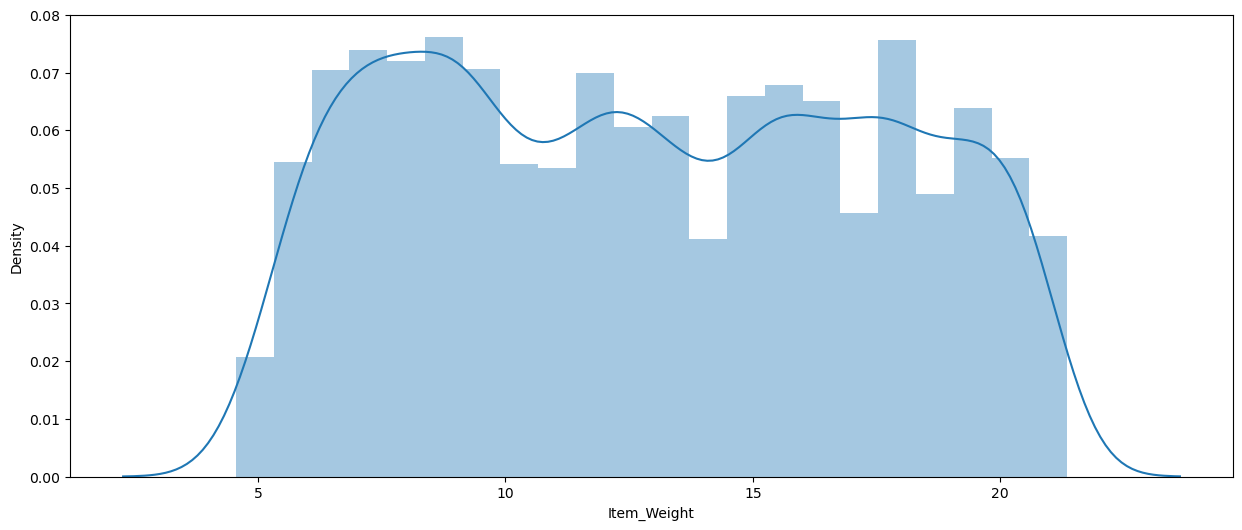

In [221]:
sns.distplot(dt['Item_Weight'])
plt.show()


In [ ]:
#Create Dist Plot – Item Visibility 

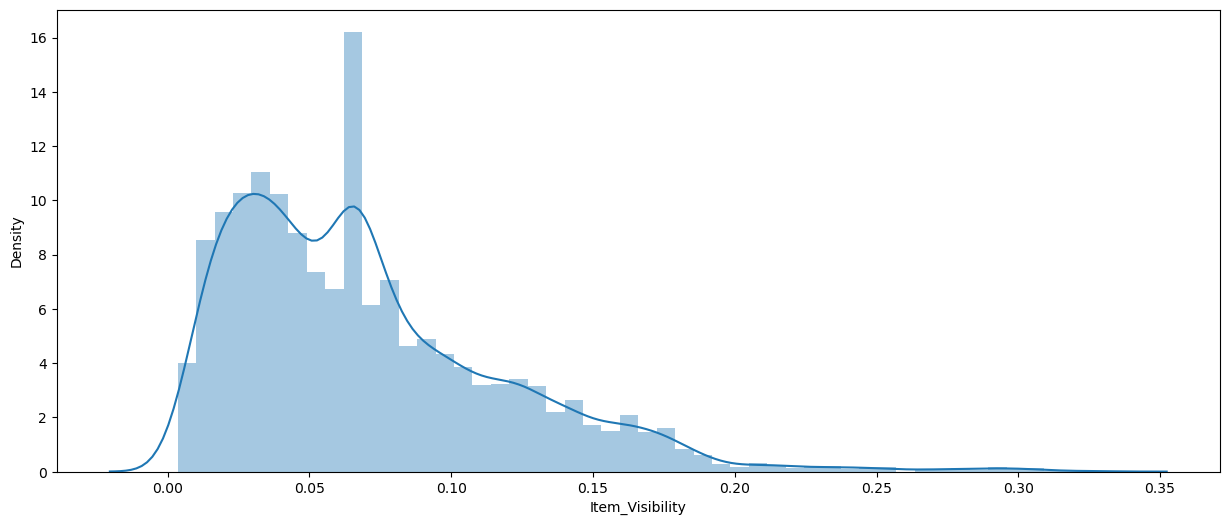

In [223]:
sns.distplot(dt['Item_Visibility'])
plt.show()


In [ ]:
#Create Dist Plot – Item MRP

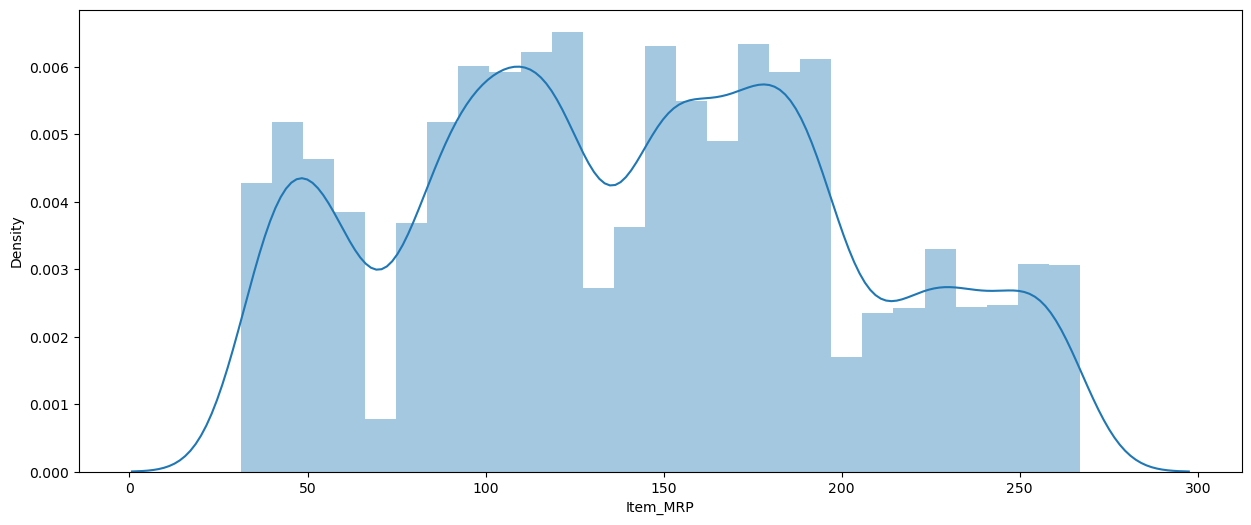

In [225]:
sns.distplot(dt['Item_MRP'])
plt.show()


In [ ]:
#Create Dist Plot – Item Outlet Sales 


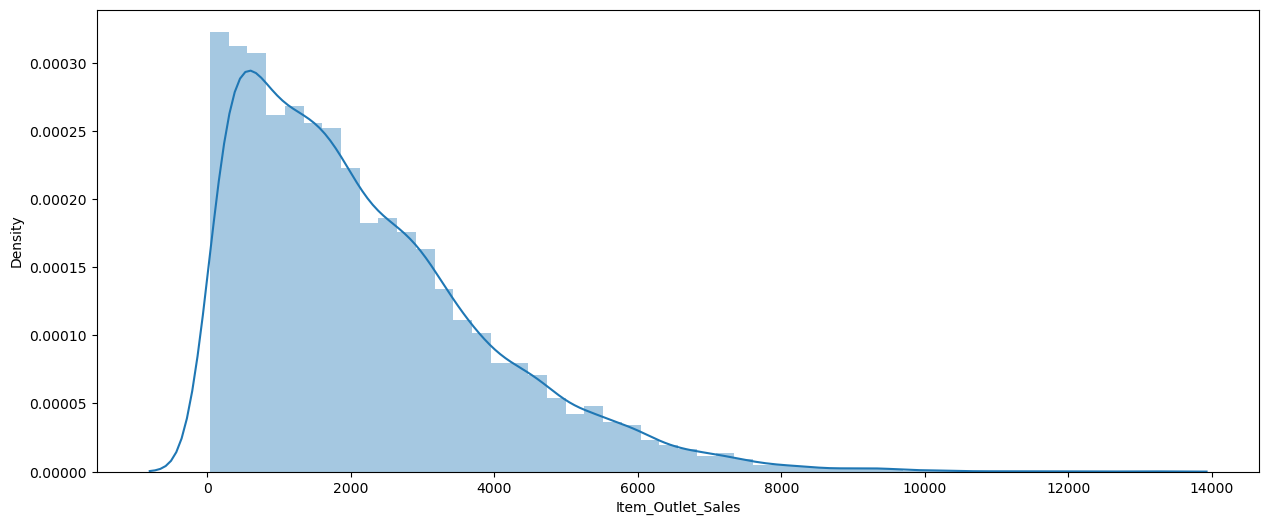

In [227]:
sns.distplot(dt['Item_Outlet_Sales'])
plt.show()



In [ ]:
Log Transformation to reduce Outliers 
# The above dist plot is right skewed, there might be outliers in the right side. To reduce the outliers, implement log transformation 


In [229]:
dt['Item_Outlet_Sales'] = np.log(1+dt['Item_Outlet_Sales'])
display (dt['Item_Outlet_Sales'])


0       8.225808
1       6.096776
2       7.648868
3       6.597664
4       6.903451
          ...   
8518    7.929984
8519    6.310436
8520    7.085159
8521    7.521100
8522    6.642056
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [ ]:
#Create Dist Plot – again 


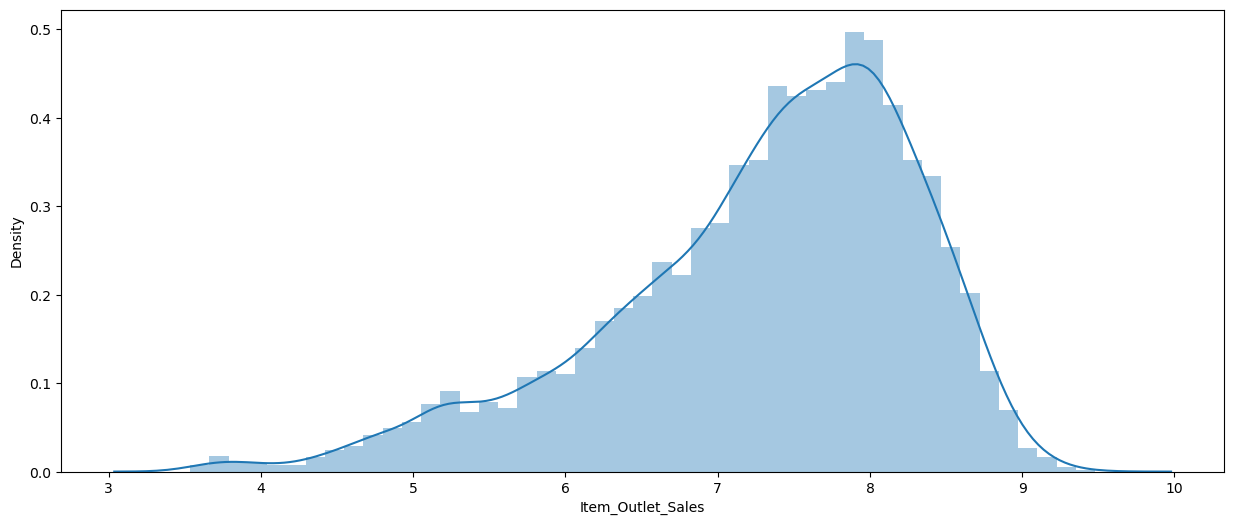

In [231]:
sns.distplot(dt['Item_Outlet_Sales'])
plt.show()


In [ ]:
#Create Count Plot – Number of records in each category 


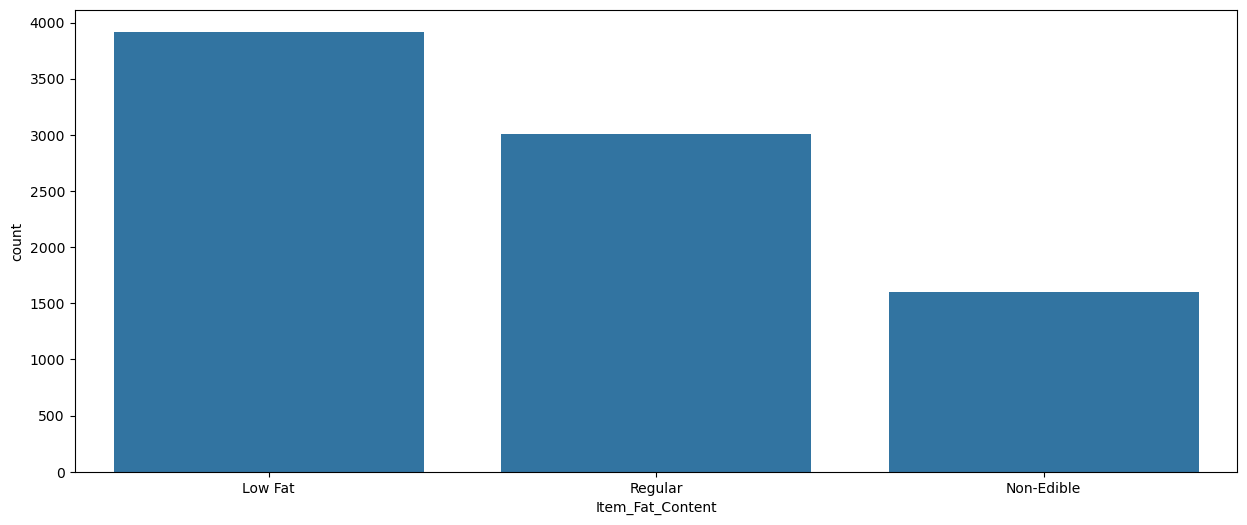

In [233]:
sns.countplot(x = dt["Item_Fat_Content"])
plt.show()


In [ ]:
#Create Count Plot – Item Type 


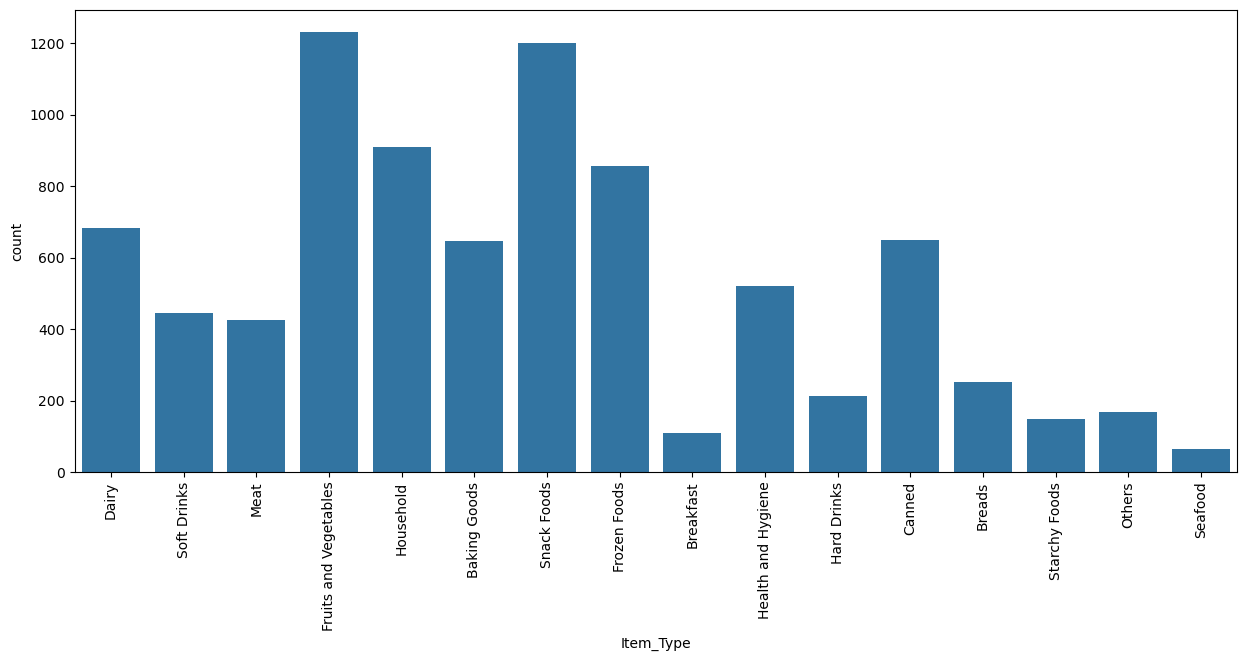

In [235]:
l = list(dt['Item_Type'].unique()) 
chart = sns.countplot(x =dt["Item_Type"])
chart.set_xticklabels(labels=l, rotation=90)
plt.show()


In [ ]:
#Create Count Plot – Establishment year 


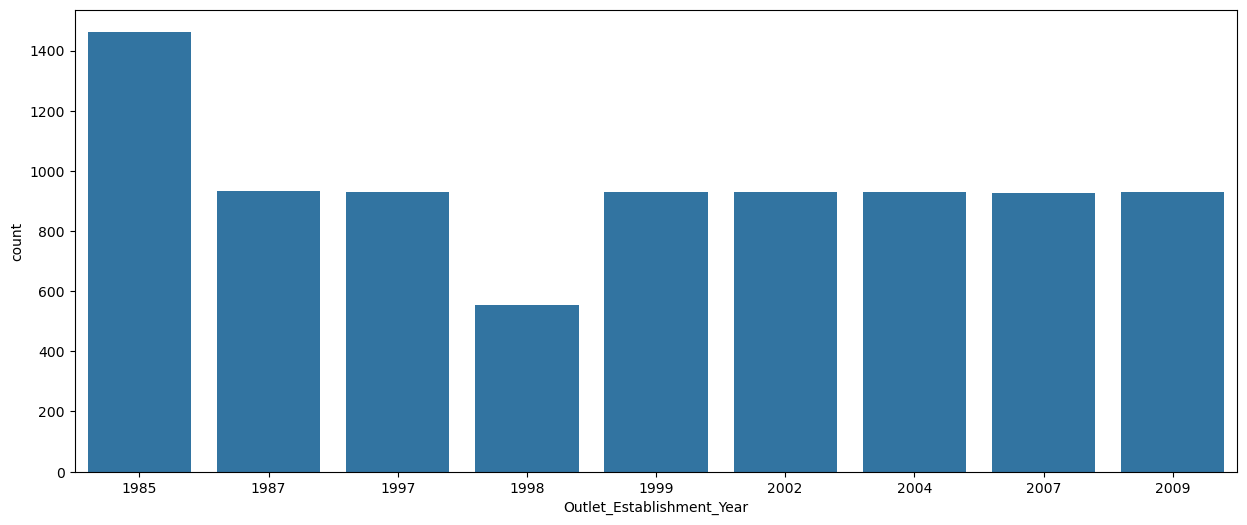

In [243]:
#Number of stores started per year  
sns.countplot(x= dt['Outlet_Establishment_Year'])
plt.show()


In [ ]:
#Count Plot Outlet Size 


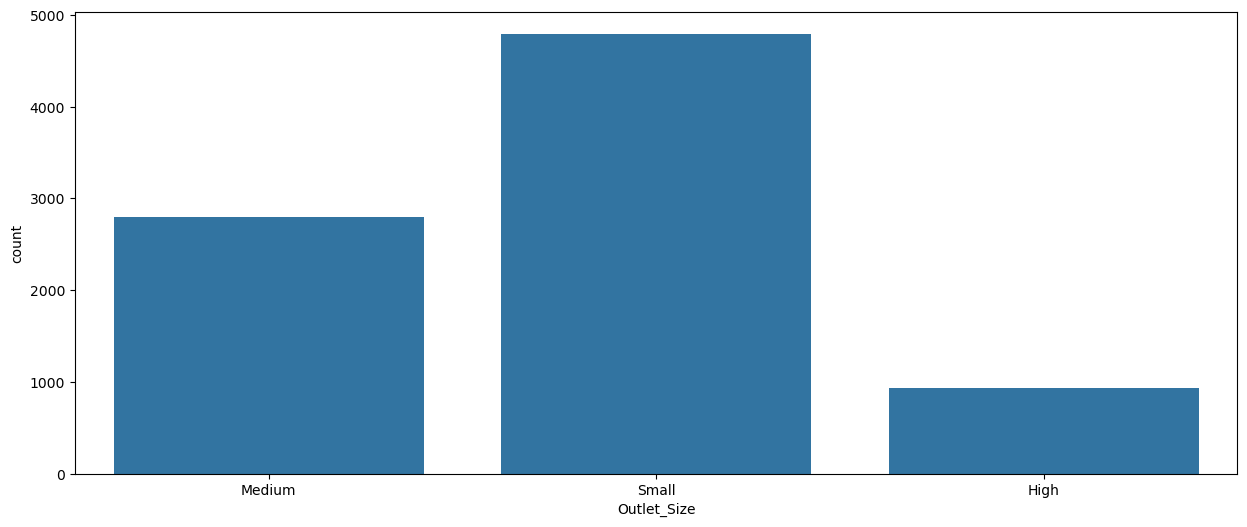

In [245]:
sns.countplot(x=dt['Outlet_Size'])
plt.show()


In [ ]:
#Count Plot Outlet Location Type 

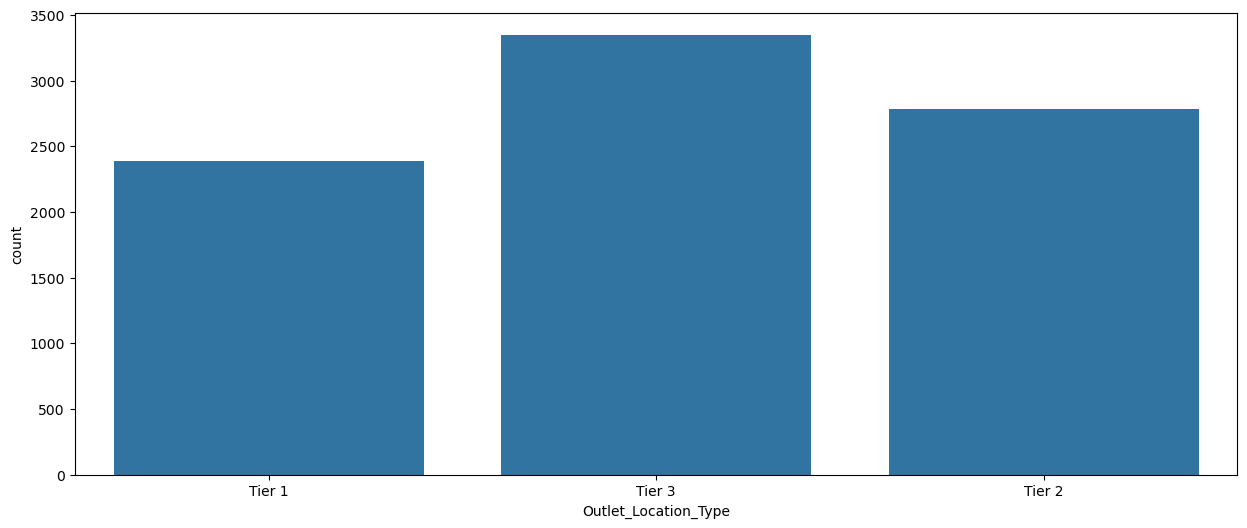

In [247]:
sns.countplot(x=dt['Outlet_Location_Type'])
plt.show()


In [ ]:
#Count Plot Outlet Type 


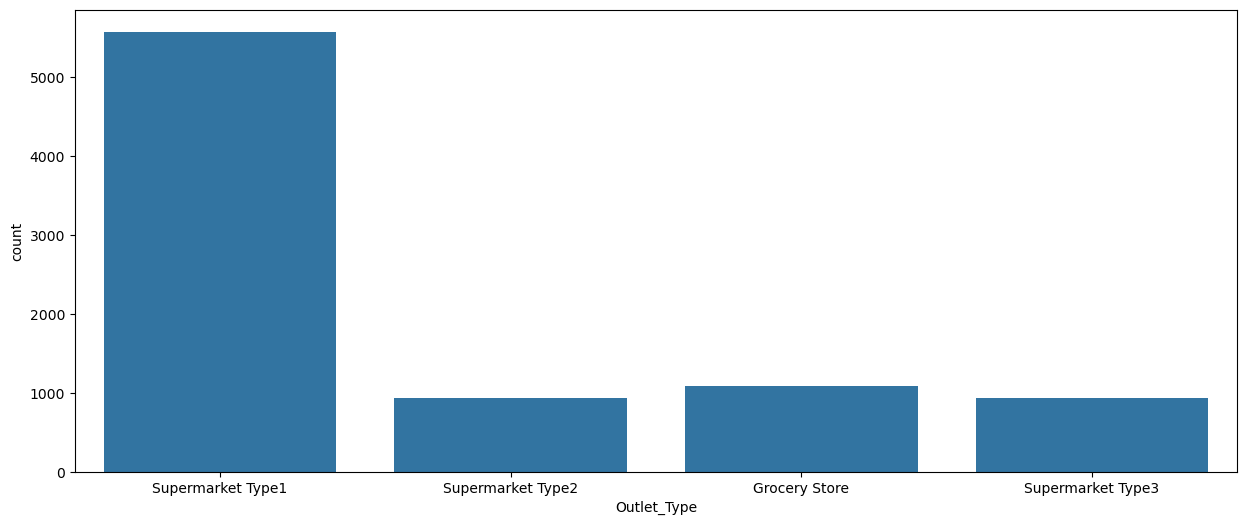

In [249]:
sns.countplot(x= dt['Outlet_Type'])
plt.show()


In [ ]:
#Co-relation Matrix



In [ ]:
#Display top 3 records to check columns with numeric values 

In [251]:
display(dt.head(3))


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,8.225808,Food,26
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,6.096776,Drinks,16
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,7.648868,Food,26


In [ ]:
#Create Data Frame with numeric columns

In [253]:
dtc= dt.iloc[:,[1,3,5,7,11,13]]
display (dtc)


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years
0,9.300,0.016047,249.8092,1999,8.225808,26
1,5.920,0.019278,48.2692,2009,6.096776,16
2,17.500,0.016760,141.6180,1999,7.648868,26
3,19.200,0.066132,182.0950,1998,6.597664,27
4,8.930,0.066132,53.8614,1987,6.903451,38
...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,7.929984,38
8519,8.380,0.046982,108.1570,2002,6.310436,23
8520,10.600,0.035186,85.1224,2004,7.085159,21
8521,7.210,0.145221,103.1332,2009,7.521100,16


In [ ]:
#Print Co relation 


In [255]:
corr = dtc.corr()
display (corr)


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years
Item_Weight,1.000000,-0.017476,0.025972,-0.013418,0.007674,0.013418
Item_Visibility,-0.017476,1.000000,-0.005259,-0.078355,-0.202466,0.078355
Item_MRP,0.025972,-0.005259,1.000000,0.005020,0.509886,-0.005020
Outlet_Establishment_Year,-0.013418,-0.078355,0.005020,1.000000,0.077032,-1.000000
Item_Outlet_Sales,0.007674,-0.202466,0.509886,0.077032,1.000000,-0.077032
Outlet_Years,0.013418,0.078355,-0.005020,-1.000000,-0.077032,1.000000


In [ ]:
#Print Co Relation Matrix 


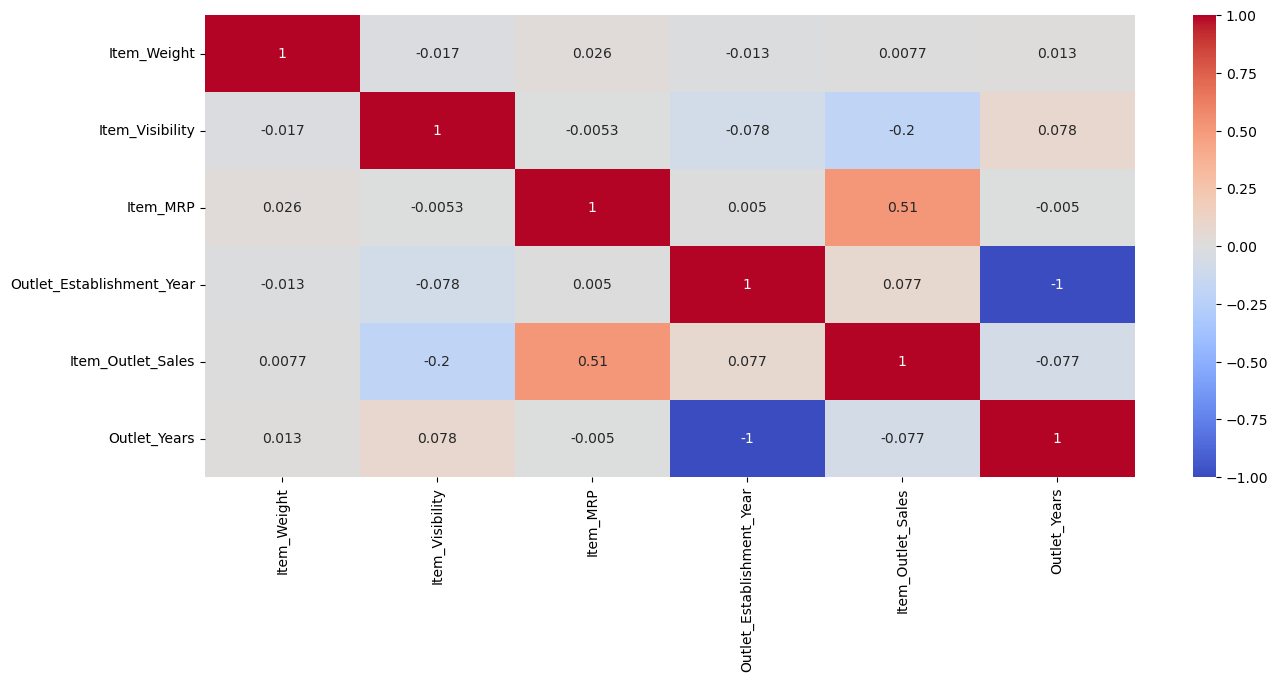

In [257]:
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


In [ ]:
#Display Top 5 Records  


In [259]:
display (dt.head())


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,8.225808,Food,26
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,6.096776,Drinks,16
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,7.648868,Food,26
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,6.597664,Food,27
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,6.903451,Non-Consumable,38


In [ ]:
#Label Encoding 


In [ ]:
#Label Encoding – Column Outlet Identifier 


In [261]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dt['Outlet'] = le.fit_transform(dt['Outlet_Identifier'])
display (dt['Outlet'])



0       9
1       3
2       9
3       0
4       1
       ..
8518    1
8519    7
8520    6
8521    3
8522    8
Name: Outlet, Length: 8523, dtype: int32

In [ ]:
#Label Encoding – Remaining columns with For loop  

In [263]:
cat_col = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type']
for col in cat_col:
    dt[col] = le.fit_transform(dt[col])
display (dt.head())   


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years,Outlet
0,FDA15,9.30,0,0.016047,4,249.8092,OUT049,1999,1,0,1,8.225808,1,26,9
1,DRC01,5.92,2,0.019278,14,48.2692,OUT018,2009,1,2,2,6.096776,0,16,3
2,FDN15,17.50,0,0.016760,10,141.6180,OUT049,1999,1,0,1,7.648868,1,26,9
3,FDX07,19.20,2,0.066132,6,182.0950,OUT010,1998,2,2,0,6.597664,1,27,0
4,NCD19,8.93,1,0.066132,9,53.8614,OUT013,1987,0,2,1,6.903451,2,38,1


In [ ]:
#One hot Encoding


In [265]:
dt = pd.get_dummies(dt, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type'],dtype = int )
display (dt.head())


,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,Outlet,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,FDA15,9.30,0.016047,4,249.8092,OUT049,1999,8.225808,26,9,...,1,0,0,0,1,0,0,0,1,0
1,DRC01,5.92,0.019278,14,48.2692,OUT018,2009,6.096776,16,3,...,0,0,1,0,0,1,0,1,0,0
2,FDN15,17.50,0.016760,10,141.6180,OUT049,1999,7.648868,26,9,...,1,0,0,0,1,0,0,0,1,0
3,FDX07,19.20,0.066132,6,182.0950,OUT010,1998,6.597664,27,0,...,0,0,1,1,0,0,0,0,1,0
4,NCD19,8.93,0.066132,9,53.8614,OUT013,1987,6.903451,38,1,...,0,0,1,0,1,0,0,0,0,1


In [ ]:
#Create X – Remove un used columns 


In [267]:
X = dt.drop(columns=['Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'])
display (X.head())



,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Years,Outlet,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Size_0,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,9.30,0.016047,4,249.8092,26,9,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,5.92,0.019278,14,48.2692,16,3,0,0,1,0,...,0,0,1,0,0,1,0,1,0,0
2,17.50,0.016760,10,141.6180,26,9,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,19.20,0.066132,6,182.0950,27,0,0,0,1,0,...,0,0,1,1,0,0,0,0,1,0
4,8.93,0.066132,9,53.8614,38,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1


In [ ]:
#Create y 


In [269]:
y = dt['Item_Outlet_Sales']
display (y.head())


0    8.225808
1    6.096776
2    7.648868
3    6.597664
4    6.903451
Name: Item_Outlet_Sales, dtype: float64

In [ ]:
#Function to create Model 



In [271]:
from sklearn import metrics 
display (",   ".join(metrics.get_scorer_names()))


'accuracy,   adjusted_mutual_info_score,   adjusted_rand_score,   average_precision,   balanced_accuracy,   completeness_score,   d2_absolute_error_score,   explained_variance,   f1,   f1_macro,   f1_micro,   f1_samples,   f1_weighted,   fowlkes_mallows_score,   homogeneity_score,   jaccard,   jaccard_macro,   jaccard_micro,   jaccard_samples,   jaccard_weighted,   matthews_corrcoef,   max_error,   mutual_info_score,   neg_brier_score,   neg_log_loss,   neg_mean_absolute_error,   neg_mean_absolute_percentage_error,   neg_mean_gamma_deviance,   neg_mean_poisson_deviance,   neg_mean_squared_error,   neg_mean_squared_log_error,   neg_median_absolute_error,   neg_negative_likelihood_ratio,   neg_root_mean_squared_error,   neg_root_mean_squared_log_error,   normalized_mutual_info_score,   positive_likelihood_ratio,   precision,   precision_macro,   precision_micro,   precision_samples,   precision_weighted,   r2,   rand_score,   recall,   recall_macro,   recall_micro,   recall_samples,   re

In [287]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
def train(model, X, y):
 print ("Train Test Split")
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print (X.shape, y.shape)
print (X_train.shape, X_test.shape ,  y_train.shape, y_test.shape)
    



(8523, 22) (8523,)
(5966, 22) (2557, 22) (5966,) (2557,)


In [ ]:
# training the model


In [289]:
model = LinearRegression()
model.fit(X_train, y_train) 

LinearRegression()

In [ ]:
# perform cross-validation


In [296]:
cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
print("Model Report")
print ('Scoring - neg_mean_squared_error')
print ( cv_score )    
cv_score = np.abs(np.mean(cv_score))    
print ('ABS Average of - neg_mean_squared_error',cv_score )       
cv_score = cross_val_score(model, X, y,  cv=5)
print ()
print ('R2 Score ')
print ( cv_score )    
cv_score = np.mean(cv_score)     
print ('Average R2 Score ',cv_score)    
print ()
    


Model Report
Scoring - neg_mean_squared_error
[-0.29362337 -0.29855725 -0.2848808  -0.28841045 -0.28022464]
ABS Average of - neg_mean_squared_error 0.28913930082856176

R2 Score 
[0.72122304 0.71063509 0.70746092 0.71541619 0.74010375]
Average R2 Score  0.7189677985191061



In [ ]:
 # Display Accuracy


In [300]:
print ('Accuracy')
print ('Accuracy of Test data')
y_test_pred = model.predict(X_test)
print('R2_Score:', r2_score(y_test,y_test_pred))
print ('Accuracy of Training data')
y_train_pred = model.predict(X_train)
print('R2_Score:', r2_score(y_train,y_train_pred))
print ('Accuracy of Complete data')
y_pred = model.predict(X)
print('R2_Score:', r2_score(y,y_pred))
print ()


Accuracy
Accuracy of Test data
R2_Score: 0.7136392054923755
Accuracy of Training data
R2_Score: 0.7232625001989983
Accuracy of Complete data
R2_Score: 0.7203110592385944



In [ ]:
  # Display graph with actual and predicted values 


Display actual and predicted values


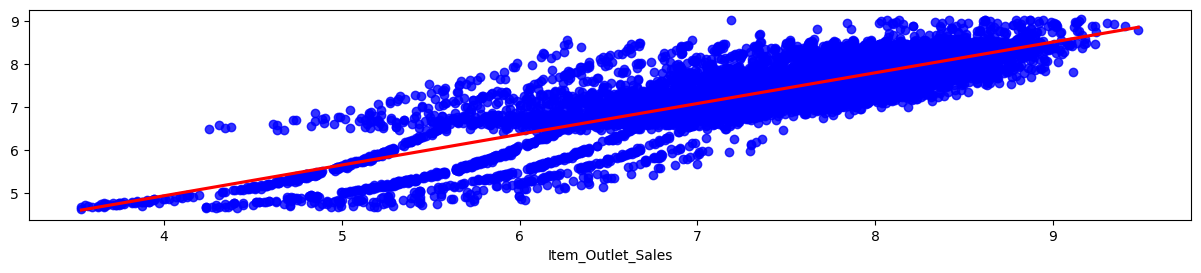

In [306]:
plt.subplot (212)
print ('Display actual and predicted values')

sns.regplot( x =y, y= y_pred, scatter_kws={"color": "b"}, line_kws={"color": "r"},ci = None)

plt.show()



In [ ]:
#Create Linear Regression Model  



Radio   -9.420555e-18
TV       1.000000e-01
dtype: float64


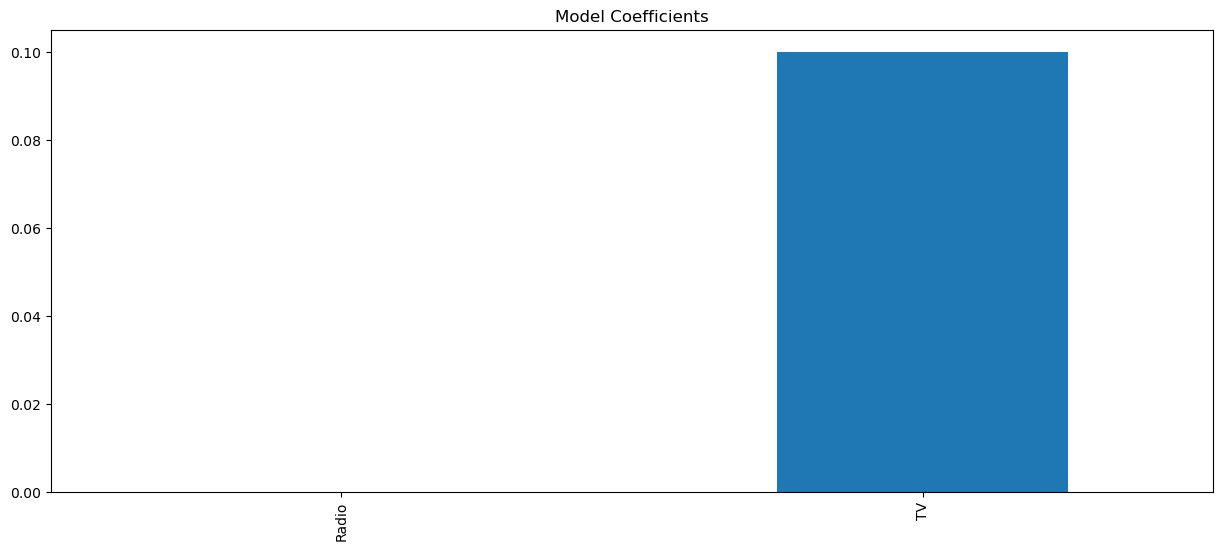

In [312]:
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Sample data
df = pd.DataFrame({
    'TV': [100, 200, 150, 300],
    'Radio': [20, 40, 35, 60],
    'Sales': [10, 20, 15, 25]
})

X = df[['TV', 'Radio']]
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Coefficients
coef = pd.Series(model.coef_, index=X.columns).sort_values()
print(coef)

# Plot
coef.plot(kind='bar', title="Model Coefficients")
plt.show()


In [ ]:
#Create Ridge Regression

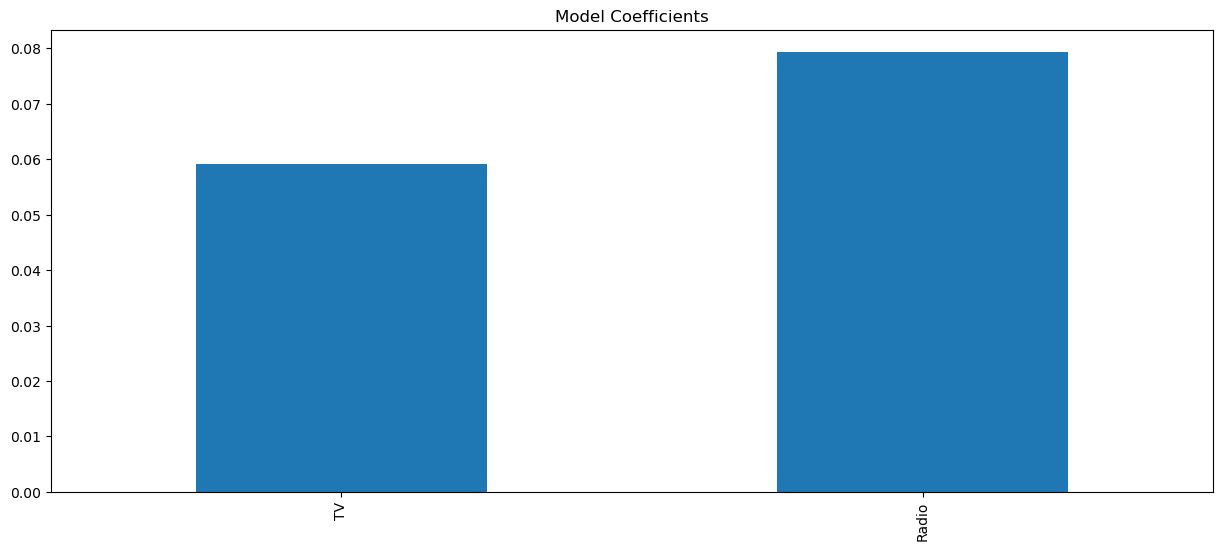

In [320]:
from sklearn.linear_model import Ridge
import pandas as pd
import matplotlib.pyplot as plt


model = Ridge()
model.fit(X, y)  # Train the model

coef = pd.Series(model.coef_, index=X.columns).sort_values()


coef.plot(kind='bar', title="Model Coefficients")
plt.show()


In [ ]:
#Create  Lasso Regression 


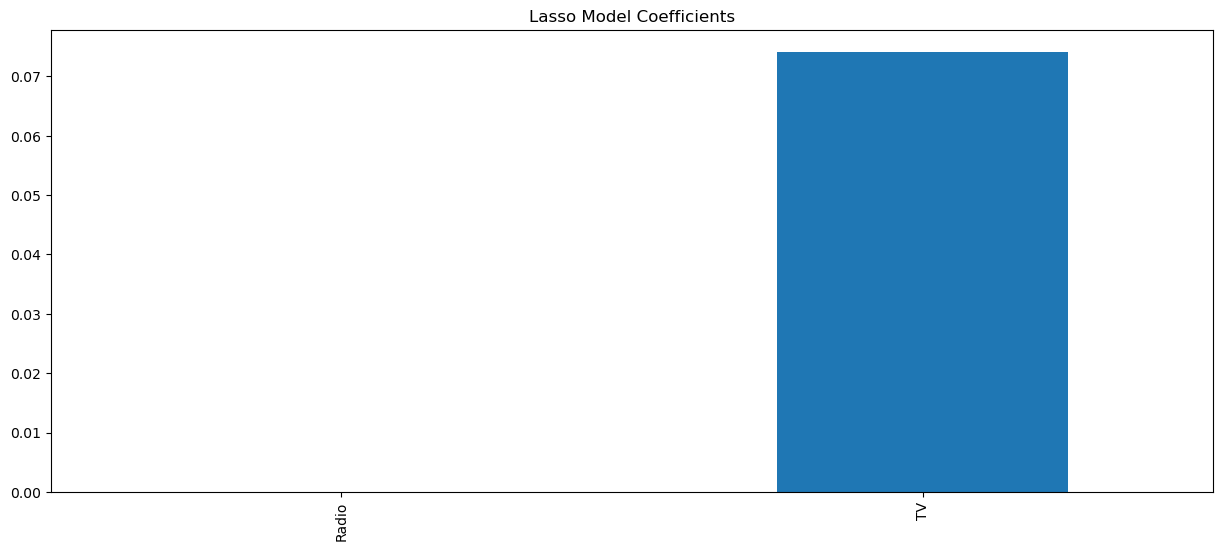

In [322]:
from sklearn.linear_model import Lasso
import pandas as pd
import matplotlib.pyplot as plt

model = Lasso()
model.fit(X, y)  # Train the Lasso regression model


coef = pd.Series(model.coef_, index=X.columns).sort_values()


coef.plot(kind='bar', title="Lasso Model Coefficients")
plt.show()



In [ ]:
#Decision Tree Regression  



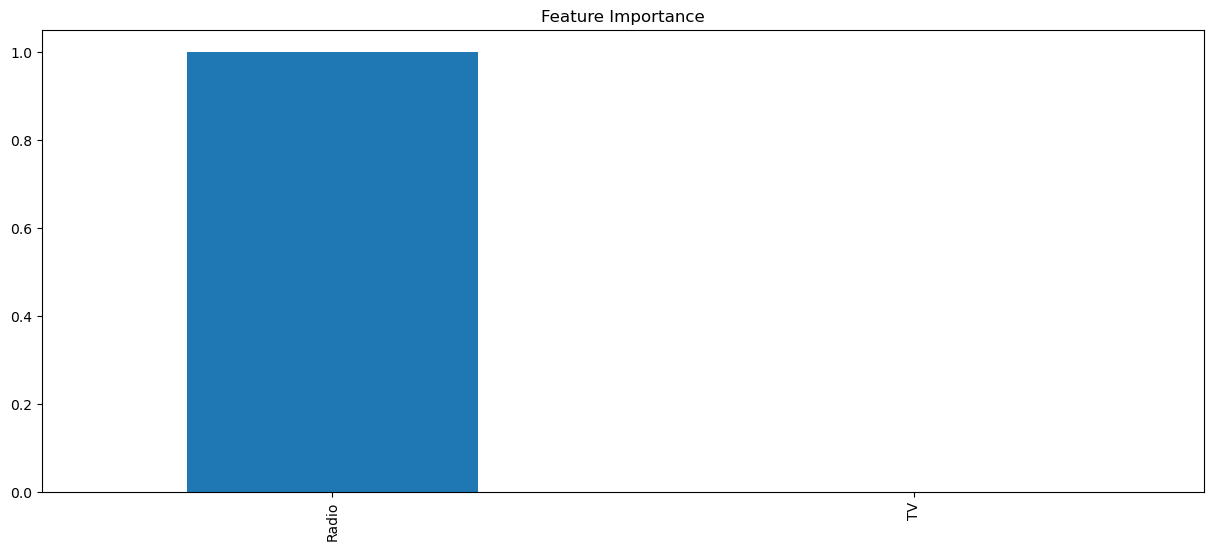

In [324]:
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import matplotlib.pyplot as plt



model = DecisionTreeRegressor()
model.fit(X, y)  # Train the model

feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot feature importance
feature_importance.plot(kind='bar', title="Feature Importance")
plt.show()



In [ ]:
#Random Forest Regression 

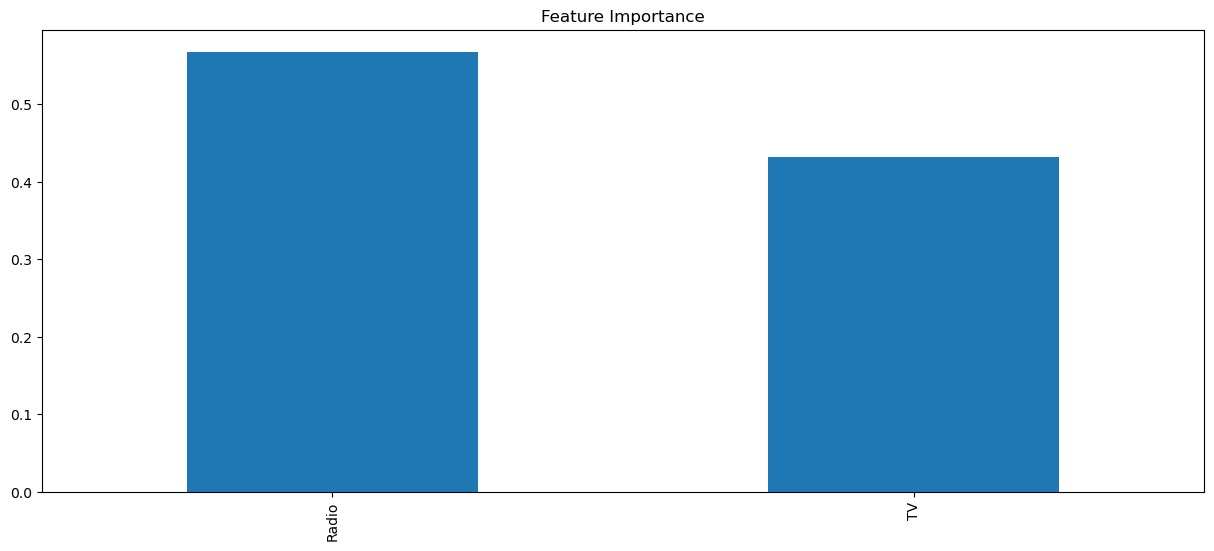

In [330]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import matplotlib.pyplot as plt

model = RandomForestRegressor()
model.fit(X, y)  # Train the model


feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot feature importance
feature_importance.plot(kind='bar', title="Feature Importance")
plt.show()



In [ ]:
#Extra Tree Regression  


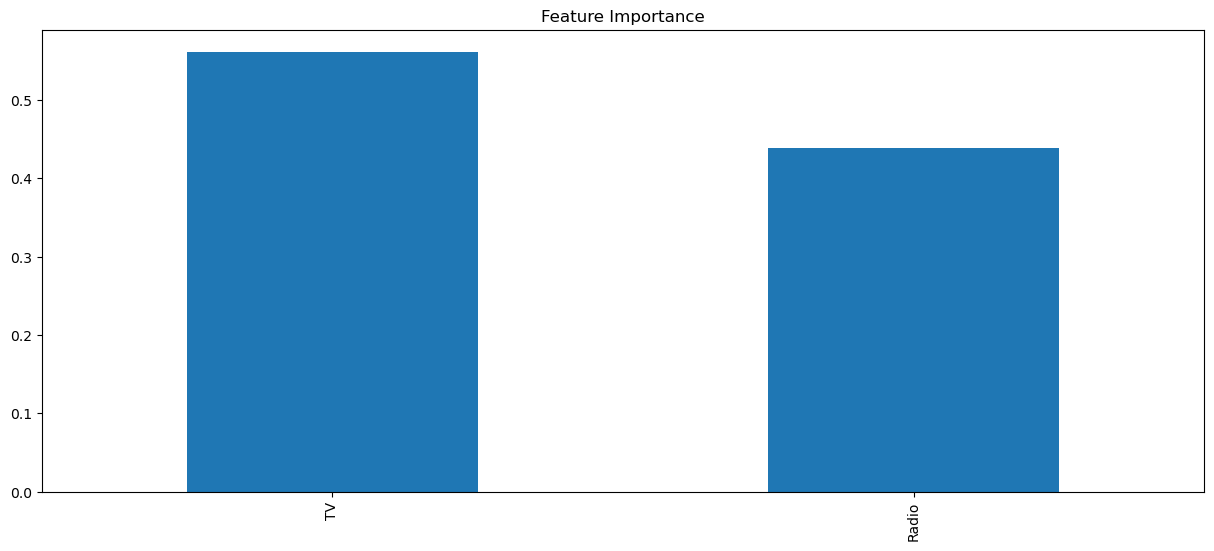

In [332]:
from sklearn.ensemble import ExtraTreesRegressor
import pandas as pd
import matplotlib.pyplot as plt



model = ExtraTreesRegressor()
model.fit(X, y)  # Train the model


feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot feature importance
feature_importance.plot(kind='bar', title="Feature Importance")
plt.show()